"""

    Este é um execício do livro, pag. 16. 
    o exercício propoe, atraves dos dados da fmi, treinar um modelo capaz de predizer o grau de medir o indice de vida melhor , atraves dos dados da ocde.

"""

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [308]:
ocde = pd.read_csv("data\BLI_04112023074714215.csv",encoding="UTF-8", delimiter=",", thousands=",")

In [309]:
print(ocde.to_markdown())

|      | LOCATION   | Country         | INDICATOR   | Indicator                                         | MEASURE   | Measure   | INEQUALITY   | Inequality   | Unit Code   | Unit                       |   PowerCode Code | PowerCode   |   Reference Period Code |   Reference Period |     Value |   Flag Codes |   Flags |
|-----:|:-----------|:----------------|:------------|:--------------------------------------------------|:----------|:----------|:-------------|:-------------|:------------|:---------------------------|-----------------:|:------------|------------------------:|-------------------:|----------:|-------------:|--------:|
|    0 | AUS        | Australia       | JE_LMIS     | Labour market insecurity                          | L         | Value     | TOT          | Total        | PC          | Percentage                 |                0 | Units       |                     nan |                nan |      3.1  |          nan |     nan |
|    1 | AUT        | Austria         | 

In [310]:
ocde.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


In [311]:
ocde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               2369 non-null   object 
 1   Country                2369 non-null   object 
 2   INDICATOR              2369 non-null   object 
 3   Indicator              2369 non-null   object 
 4   MEASURE                2369 non-null   object 
 5   Measure                2369 non-null   object 
 6   INEQUALITY             2369 non-null   object 
 7   Inequality             2369 non-null   object 
 8   Unit Code              2369 non-null   object 
 9   Unit                   2369 non-null   object 
 10  PowerCode Code         2369 non-null   int64  
 11  PowerCode              2369 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  2369 non-null   float64
 15  Flag

In [312]:
ocde_filt = ocde[ocde["Indicator"] == "Life satisfaction"]

In [313]:
ocde_filt = ocde_filt[ocde_filt["INEQUALITY"] == "HGH"]

In [314]:
ocde_filt = ocde_filt[["Country","Value"]]

In [315]:
countries_to_remove = ['France', 'Mexico', 'Estonia']

In [316]:
ocde_filt = ocde_filt[~ocde_filt["Country"].isin(countries_to_remove)]

In [317]:
ocde_filt

,Country,Value
1839,Australia,7.4
1840,Austria,7.6
1841,Belgium,7.2
1842,Canada,7.3
1843,Czech Republic,7.6
1844,Denmark,7.6
1845,Finland,8.5
1847,Germany,7.8
1848,Greece,6.5
1849,Hungary,6.9


In [318]:
fmi = pd.read_csv("data\WEOOct2023all.xls", thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [319]:
fmi

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,288.87","1,021.60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-2.351,-20.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,547.29","1,232.86",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.136,14.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.007,67.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,"1,380.14","3,187.63","12,292.67","111,864.93","474,084.10","1,102,309.64","2,089,955.60","3,126,416.82","4,128,929.25",2021.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.678,0.348,0.321,0.28,-0.317,-0.411,-0.466,-0.512,-0.55,2022.0
8623,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,2.521,0.968,1.019,0.863,-0.673,-0.827,-0.922,-1.081,-1.12,2022.0
8624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
fmi.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,288.87","1,021.60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-2.351,-20.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,547.29","1,232.86",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.136,14.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.007,67.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0


In [321]:
fmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8625 non-null   object 
 1   ISO                            8624 non-null   object 
 2   WEO Subject Code               8624 non-null   object 
 3   Country                        8624 non-null   object 
 4   Subject Descriptor             8624 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8624 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7643 non-null   object 
 9   1980                           3858 non-null   object 
 10  1981                           3988 non-null   object 
 11  1982                           4032 non-null   object 
 12  1983                           4073 non-null   o

In [322]:
fmi_fil = fmi[fmi["WEO Subject Code"].isin(["LUR"])]

In [323]:
fmi_fil_2 = fmi[fmi["WEO Subject Code"].isin(["NGDPDPC"])]
fmi_fil_2 = fmi_fil_2[["Country", "2015" , "2023"]]
fmi_fil_2.dropna(axis=0)

,Country,2015,2023
53,Albania,"3,953.61","8,057.49"
97,Algeria,"4,153.32","4,874.71"
141,Andorra,"38,877.49","44,107.32"
185,Angola,"4,130.93","2,550.00"
229,Antigua and Barbuda,"14,728.71","19,068.28"
...,...,...,...
8369,Venezuela,"4,096.97","3,474.33"
8413,Vietnam,"2,581.91","4,316.34"
8501,Yemen,"1,508.38",617.67
8545,Zambia,"1,307.54","1,435.89"


In [324]:
fmi_fil = fmi_fil[["Country", "2015" , "2023"]]

In [325]:
fmi_fil.dropna(axis=0)

,Country,2015,2023
68,Albania,17.1,11
156,Andorra,3.575,1.9
288,Argentina,6.533,7.35
332,Armenia,18.5,13.5
376,Aruba,7.298,8.465
...,...,...,...
8208,United States,5.275,3.569
8252,Uruguay,7.525,8.129
8296,Uzbekistan,5.153,8.351
8428,Vietnam,2.33,2.094


In [326]:
#pib = fmi_fil[fmi_fil["Subject Descriptor"].isin(["Implied PPP conversion rate"])]

In [327]:
#pib = pib.drop(["Subject Descriptor"], axis=1)

In [328]:
ocde_filt

,Country,Value
1839,Australia,7.4
1840,Austria,7.6
1841,Belgium,7.2
1842,Canada,7.3
1843,Czech Republic,7.6
1844,Denmark,7.6
1845,Finland,8.5
1847,Germany,7.8
1848,Greece,6.5
1849,Hungary,6.9


In [329]:
#pib

In [330]:
dado = pd.merge(fmi_fil_2,ocde_filt,on="Country", how= "inner")

In [331]:
print(dado.to_markdown())

|    | Country         | 2015       | 2023       |   Value |
|---:|:----------------|:-----------|:-----------|--------:|
|  0 | Australia       | 51,412.41  | 63,487.05  |     7.4 |
|  1 | Austria         | 44,267.81  | 58,013.27  |     7.6 |
|  2 | Belgium         | 41,147.26  | 53,656.83  |     7.2 |
|  3 | Brazil          | 9,183.00   | 10,413.00  |     6.9 |
|  4 | Canada          | 43,626.47  | 53,246.98  |     7.3 |
|  5 | Chile           | 13,494.49  | 17,253.75  |     6.9 |
|  6 | Colombia        | 6,337.04   | 6,975.87   |     7.1 |
|  7 | Costa Rica      | 11,635.20  | 16,213.26  |     7.1 |
|  8 | Czech Republic  | 17,842.87  | 30,474.53  |     7.6 |
|  9 | Denmark         | 53,478.50  | 71,402.14  |     7.6 |
| 10 | Finland         | 42,867.09  | 54,507.14  |     8.5 |
| 11 | Germany         | 41,107.10  | 52,823.58  |     7.8 |
| 12 | Greece          | 18,023.87  | 23,173.06  |     6.5 |
| 13 | Hungary         | 12,700.30  | 21,075.62  |     6.9 |
| 14 | Iceland         |

In [332]:
#dado_final = dado.dropna(axis=0)

In [333]:
#dado_final

<Axes: xlabel='2023', ylabel='Value'>

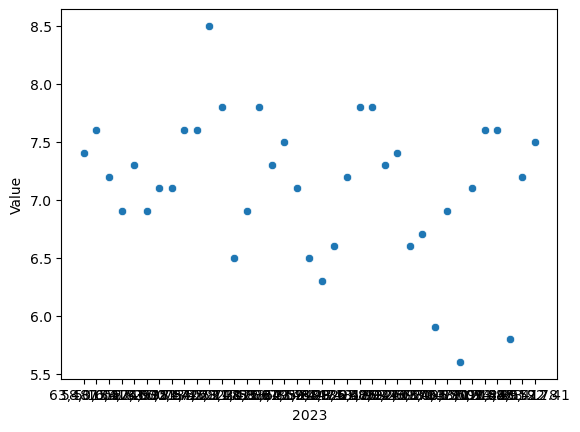

In [334]:
sns.scatterplot(data= dado, y="Value", x= "2023")

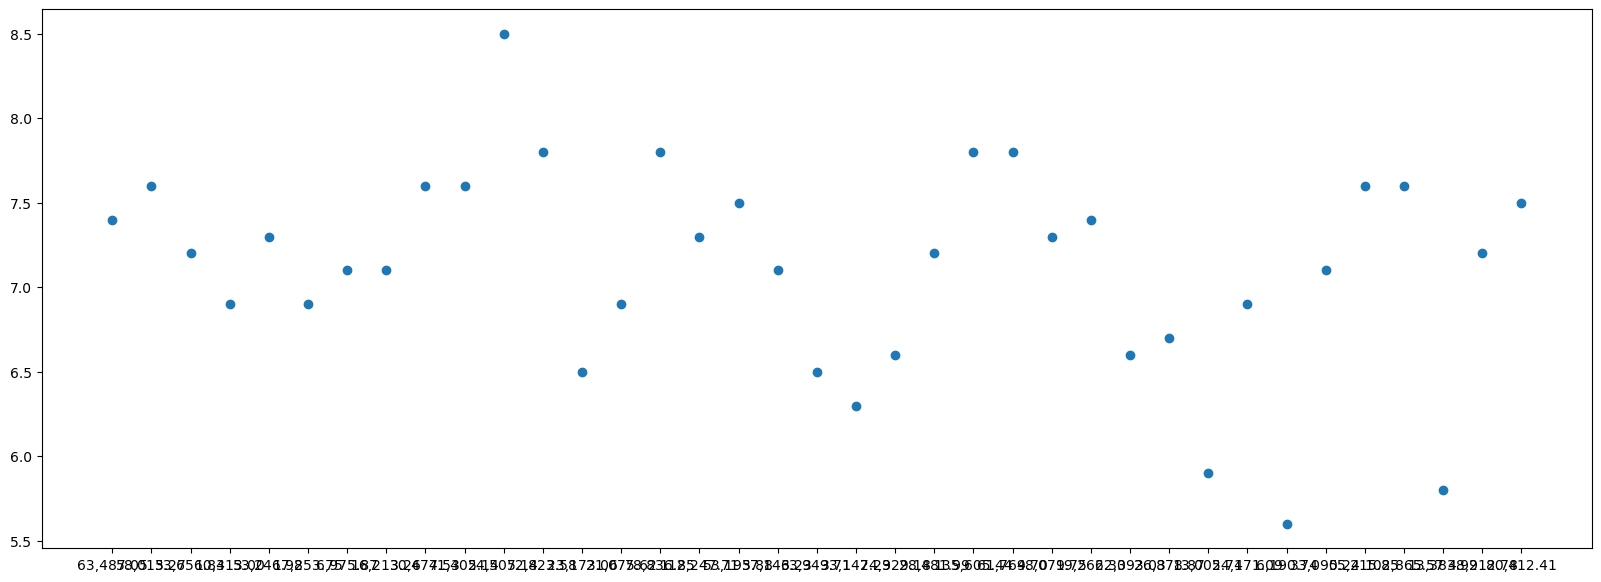

In [335]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(data= dado, y="Value", x= "2023")

In [340]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [342]:
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(n_neighbors=3)

In [365]:
from sklearn.model_selection import train_test_split

X = np.c_[dado["Value"]]
Y = np.c_[dado["2023"].str.replace(",","").astype(float)]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

AttributeError: 'Series' object has no attribute 'reshape'

In [366]:
model.fit(x_train, y_train)
model1.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [367]:
model.predict(y_test)

array([[7.97066813e+08],
       [2.19441117e+09],
       [2.06177494e+09],
       [3.93701900e+08],
       [6.13124647e+08],
       [1.25373355e+09],
       [1.28409122e+09],
       [8.46904185e+08]])

In [368]:
model1.predict(y_test)

array([[89088.62333333],
       [89088.62333333],
       [89088.62333333],
       [89088.62333333],
       [89088.62333333],
       [89088.62333333],
       [89088.62333333],
       [89088.62333333]])

In [375]:
# Flatten the predictions and ensure x_test is 1D if it isn't already
y_pred_model = model.predict(y_test).flatten()  # Flatten the predictions to 1D
y_pred_model1 = model1.predict(y_test).flatten()  # Flatten the predictions to 1D
x_test_1D = x_test.flatten() if x_test.ndim > 1 else x_test

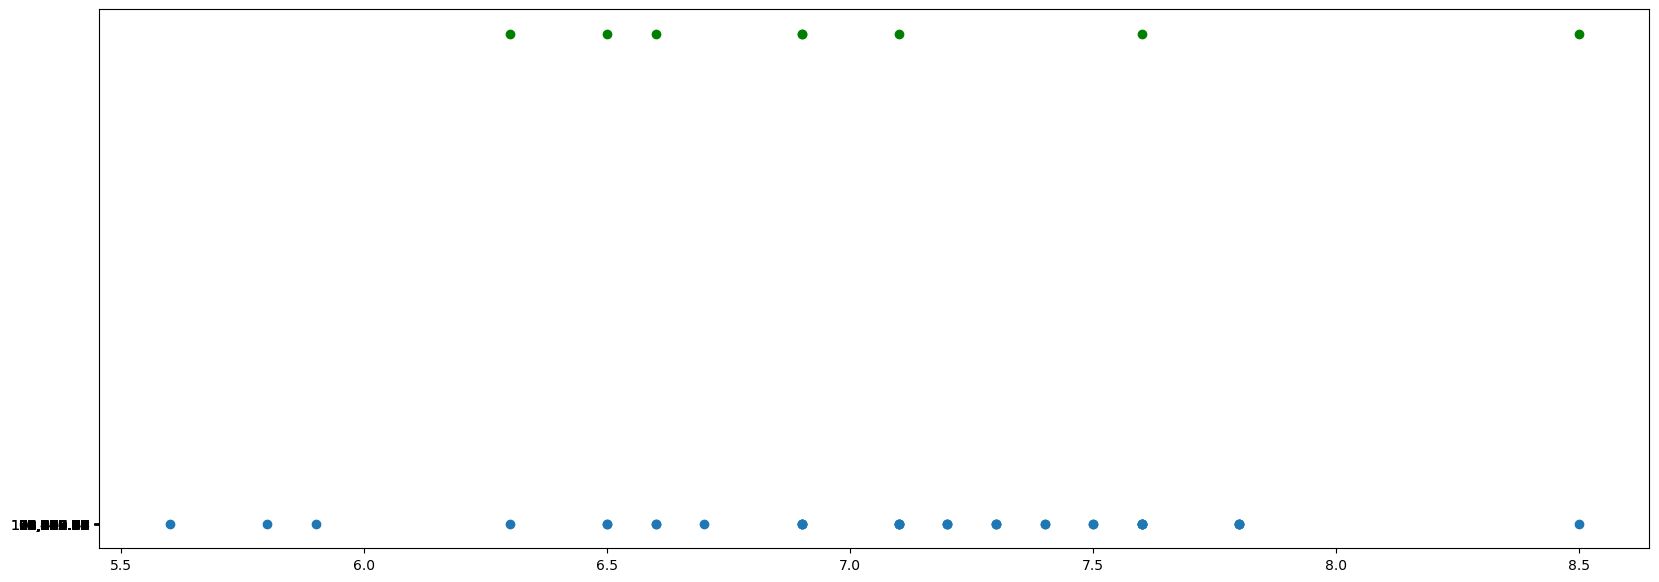

In [376]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(data= dado, x="Value", y= "2023")
#plt.scatter(x=x_test_1D, y=y_pred_model, color="r")
plt.scatter(x=x_test_1D, y=y_pred_model1, color="g")